In [1]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
if not os.path.exists('dataset'):
    src=['../../../dataset/presentation'] 
    dst=['./dataset']
    os.symlink(src, dst)
if not os.path.exists('common'):
    src=['../../../common/presentation'] 
    dst=['./common']
    os.symlink(src, dst)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.3060237209502845
=== epoch:1, train acc:0.07666666666666666, test acc:0.0946 ===
train loss:2.321803046751178
train loss:2.3113052329845853
train loss:2.3138618503613473
=== epoch:2, train acc:0.08333333333333333, test acc:0.0951 ===
train loss:2.297742698122118
train loss:2.3234221609681107
train loss:2.3063487460346606
=== epoch:3, train acc:0.08333333333333333, test acc:0.0968 ===
train loss:2.3003645743608434
train loss:2.3191705302339347
train loss:2.296497222217152
=== epoch:4, train acc:0.09666666666666666, test acc:0.102 ===
train loss:2.305958501763866
train loss:2.3172875729264315
train loss:2.301896604538139
=== epoch:5, train acc:0.1, test acc:0.1075 ===
train loss:2.3261242588375843
train loss:2.306643173474597
train loss:2.301784803295487
=== epoch:6, train acc:0.09333333333333334, test acc:0.1105 ===
train loss:2.3025750657852497
train loss:2.3226152085416767
train loss:2.29410504172908
=== epoch:7, train acc:0.09666666666666666, test acc:0.1136 ===
train lo

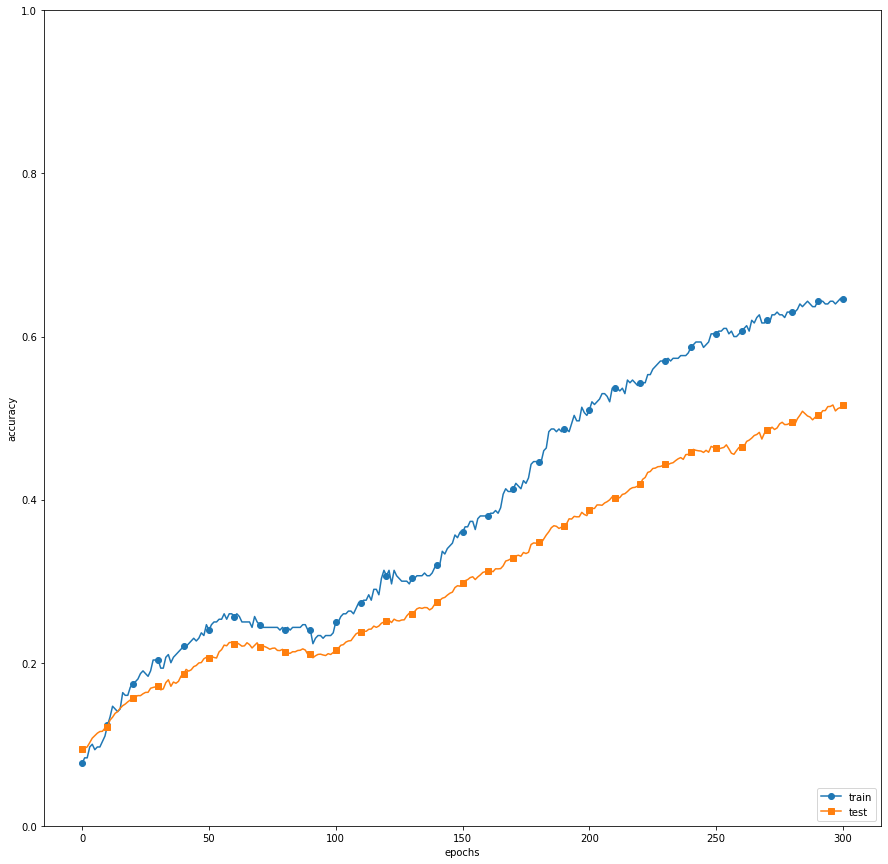

In [2]:
# グラフの描画==========
fig = plt.figure(figsize=(15,15)) # グラフの全体サイズを拡大
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
fig.savefig("dropout.png")